In [1]:
import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
files = [ file for file in os.listdir(r'C:\Sales')]
for file in files:
        print(file)                            
    

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
import pandas as pd
path = r'C:\Sales'
big_data = (pd.DataFrame())
for file in files:
    current_data= pd.read_csv(path+'/'+file)
    big_data= pd.concat([big_data, current_data])
print(big_data)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

In [4]:
# no feedback
big_data.to_csv(path+'/big_data.csv', index=False)

In [5]:
big_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
big_data = big_data.dropna(how='all')
big_data.shape

(186305, 6)

In [7]:
def month(x):
    return x.split('/')[0]


In [8]:
big_data['Month']= big_data['Order Date'].apply(month)

In [9]:
big_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [10]:
big_data = big_data[big_data['Month']!='Order Date']

In [11]:
big_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [12]:
big_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [13]:
big_data['Month']= big_data['Month'].astype(int)

In [14]:
big_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [15]:
big_data['Price Each']= big_data['Price Each'].astype(float)
big_data['Quantity Ordered']= big_data['Quantity Ordered'].astype(int)

In [16]:
big_data['sals']= big_data['Quantity Ordered'] *big_data['Price Each']  

In [17]:
big_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sals
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [19]:
 #grouper par mois la somme des ventes(sales)
big_data.groupby('Month')['sals'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sals, dtype: float64

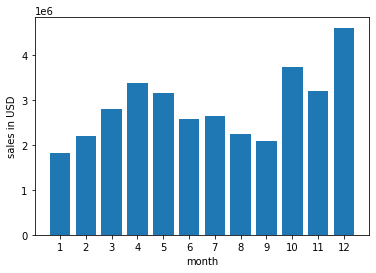

In [21]:
month= range(1,13)
plt.bar(month, big_data.groupby('Month')['sals'].sum())
plt.xticks(month)
plt.ylabel('sales in USD')
plt.xlabel('month')
plt.show()

#  Les Villes  qui recoivent le plus de commande?

In [22]:
def city(x):
    return x.split(',')[1]


In [23]:
big_data['city']= big_data['Purchase Address'].apply(city)

In [24]:
big_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sals,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [25]:
# compter le nombre de commande par ville
big_data.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

In [32]:
big_data.groupby('city')['city'].count().index

Index([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype='object', name='city')

In [33]:
big_data.groupby('city')['city'].count().values

array([14881,  9905, 19934, 14820, 29605, 24876, 12465, 44732, 14732],
      dtype=int64)

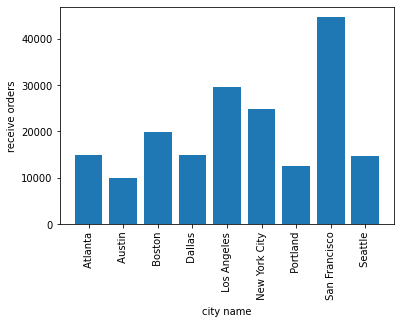

In [34]:

plt.bar(big_data.groupby('city')['city'].count().index, big_data.groupby('city')['city'].count().values)
plt.xticks(rotation='vertical')
plt.ylabel('receive orders')
plt.xlabel('city name')
plt.show()

In [29]:
 #grouper par produit  les villes
big_data.groupby('city')['Product'].count()



city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: Product, dtype: int64

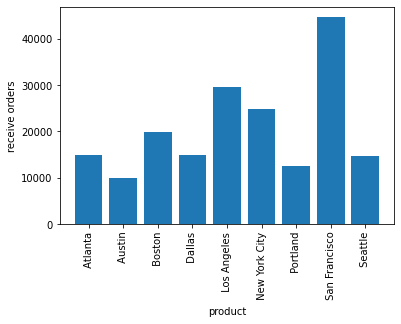

In [36]:
plt.bar(big_data.groupby('city')['Product'].count().index, big_data.groupby('city')['Product'].count().values)
plt.xticks(rotation='vertical')
plt.ylabel('receive orders')
plt.xlabel('product')
plt.show()

In [ ]:
# ville qui recoivent le plus de commande San francisco suivie de Los angeles
# La ville d'Atlanta et Austiin recoivent le moins de commande à savoir pourquoi..


# A qu'elle moment devrait on faire une campagne publicitaire pour plus de vente?

In [38]:
big_data['Hour']= pd.to_datetime(big_data['Order Date']).dt.hour

In [39]:
big_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sals,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [40]:
keys=[]
hours=[]
for key,hour in big_data.groupby('Hour'):
    keys.append(key)# pour chaque boucle, le nombre de fois que la boucle se repete append(ajouter)
    hours.append(len(hour))
hours# nombre de commande par heure
# exple8 a 3910 fois

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

In [41]:
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [42]:
big_data.groupby('Hour')

Text(0, 0.5, 'nombre de commandes hours')

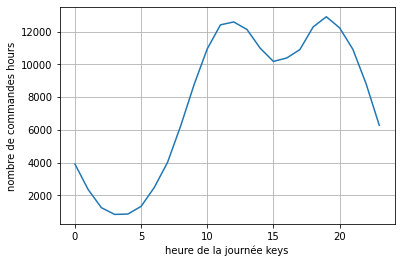

In [44]:
plt.grid()
plt.plot(keys, hours)
plt.xlabel('heure de la journée keys')
plt.ylabel('nombre de commandes hours')

In [ ]:
# meilleur créneau pour lancer campagne publicitaire entre  environ vers10h  et et vers 17h


# Quel produit se vend le plus?

In [45]:
big_data.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

<AxesSubplot:xlabel='Product'>

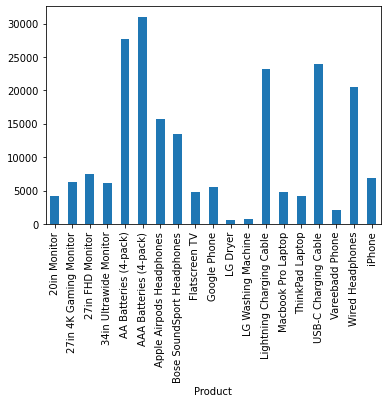

In [47]:
big_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [ ]:
les produits qui se vendent le plus sont les batteries etc..

In [ ]:
#L'impact du prix

<AxesSubplot:xlabel='Product'>

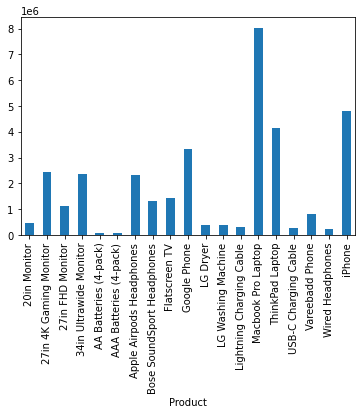

In [48]:
# 
big_data.groupby('Product')['Price Each'].sum().plot(kind='bar')

In [49]:
big_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<AxesSubplot:xlabel='Product'>

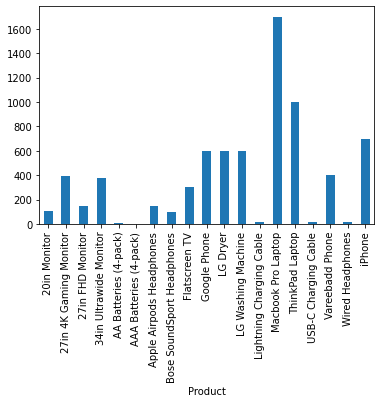

In [50]:
big_data.groupby('Product')['Price Each'].mean().plot(kind='bar')

In [53]:
# grouper par produit les quantites en index
products= big_data.groupby('Product')['Quantity Ordered'].sum().index
# grouper par produit la somme des quantites
quantity=  big_data.groupby('Product')['Quantity Ordered'].sum()
prices = big_data.groupby('Product')['Price Each'].mean()

<ipython-input-63-c7c894db7a53>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

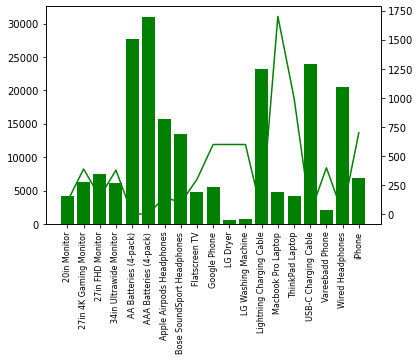

In [63]:
plt.figure(figsize=(40, 24))
fig,ax1= plt.subplots()
ax2= ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, color='g')
ax1.set_xticklabels(products, rotation='vertical', size=8)

In [ ]:
Les produits vendus à grande quantité sont à petits pris et les produits qui sont vensus à petite quantité sont à trés frand prix..


# Combinaisons de produits qui se vendent le plus?

In [64]:
big_data.to_csv(path+'/big_datav.csv', index=False)

In [1]:
import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('big_data.csv')
df.head()
big_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [11]:
big_datav = pd.read_csv('big_datav.csv') 
big_datav

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sals,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
185946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [13]:
df = big_datav[big_datav['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sals,city,Hour
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
17,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
18,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
29,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11
...,...,...,...,...,...,...,...,...,...,...
185893,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20
185904,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0
185905,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0
185941,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13


In [14]:
# prendre les combinaisons qui ont été commandé en même temps
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

<ipython-input-14-92e6b79e67f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [15]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sals,city,Hour,Grouped
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...
185893,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185904,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
185905,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
185941,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13,"Google Phone,USB-C Charging Cable"


In [17]:
df2 = df.drop_duplicates(subset=['Order ID'])
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sals,city,Hour,Grouped
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
118,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...
185882,259296,Apple Airpods Headphones,1,150.00,09/28/19 16:48,"894 6th St, Dallas, TX 75001",9,150.00,Dallas,16,"Apple Airpods Headphones,Apple Airpods Headphones"
185884,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",9,700.00,Boston,18,"iPhone,Lightning Charging Cable,Lightning Char..."
185892,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185904,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"


<AxesSubplot:ylabel='Grouped'>

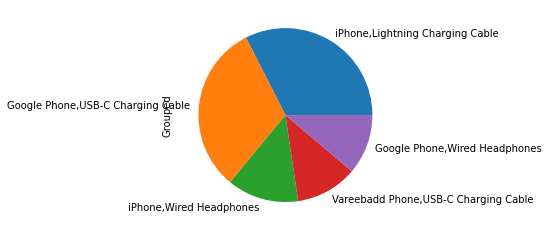

In [20]:
df2.Grouped.value_counts()[0:5].plot.pie()

#  Application des time series pour une analyse plus fine

In [41]:
b = pd.read_csv('big_datav.csv')
b.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sals,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [44]:
b['Order Date'] = pd.to_datetime(b['Order Date'], errors = 'coerce')
b.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sals,city,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [46]:
# On rajoute le jour de la semaine
b['jour_semaine'].dt.weekday
b

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sals,city,Hour,jour_semaine
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,6
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,1
...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20,1
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16,6
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7,0
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17,3


In [50]:
b['day'] =  b['Order Date'].dt.day
b['Order_date'] = b['Order Date'].dt.strftime('%d/%m/%y')
b['year'] = b['Order Date'].dt.year
b

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sals,city,Hour,jour_semaine,day,new_formatted_date,year,Order_date
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,4,19,19/04/19,2019,19/04/19
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,6,7,07/04/19,2019,07/04/19
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,4,12,12/04/19,2019,12/04/19
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,4,12,12/04/19,2019,12/04/19
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,1,30,30/04/19,2019,30/04/19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20,1,17,17/09/19,2019,17/09/19
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16,6,1,01/09/19,2019,01/09/19
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7,0,23,23/09/19,2019,23/09/19
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17,3,19,19/09/19,2019,19/09/19


In [52]:

b = b.drop(['year', 'Order Date', 'new_formatted_date'], axis =1)


KeyError: "['year' 'Order Date' 'new_formatted_date'] not found in axis"

In [53]:
b

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,sals,city,Hour,jour_semaine,day,Order_date
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,4,19,19/04/19
1,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,6,7,07/04/19
2,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,4,12,12/04/19
3,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,4,12,12/04/19
4,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,1,30,30/04/19
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20,1,17,17/09/19
185946,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16,6,1,01/09/19
185947,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7,0,23,23/09/19
185948,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17,3,19,19/09/19


In [55]:
path = r'C:\Sales'
b.to_csv(path+'/b.csv', index=False)

In [56]:
b.to_csv('b.csv', index= False)

In [57]:
data_date= pd.read_csv('b.csv', index_col = 'Order_date', parse_dates = True)
data_date.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,sals,city,Hour,jour_semaine,day
Order_date,,,,,,,,,,,
2019-04-19,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,4,19
2019-07-04,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,6,7
2019-12-04,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,4,12
2019-12-04,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,4,12
2019-04-30,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,1,30


In [58]:
data_date.index

DatetimeIndex(['2019-04-19', '2019-07-04', '2019-12-04', '2019-12-04',
               '2019-04-30', '2019-04-29', '2019-02-04', '2019-12-04',
               '2019-04-24', '2019-08-04',
               ...
               '2019-01-09', '2019-09-30', '2019-09-30', '2019-01-09',
               '2019-07-09', '2019-09-17', '2019-01-09', '2019-09-23',
               '2019-09-19', '2019-09-30'],
              dtype='datetime64[ns]', name='Order_date', length=185950, freq=None)

In [59]:
b.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Purchase Address     object
Month                 int64
sals                float64
city                 object
Hour                  int64
jour_semaine          int64
day                   int64
Order_date           object
dtype: object

In [66]:
#big_date['index_col'] = big_date['index_col'].apply( lambda x: x[1:11])
data_date['jour_semaine'] = data_date['jour_semaine'].astype('object')
data_date['Month'] = data_date['Month'].astype('object')
data_date['Order ID'] = data_date['Order ID'].astype('object')
data_date['Hour'] = data_date['Hour'].astype('object')
data_date['day'] = data_date['day'].astype('object')


In [67]:
data_date.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Purchase Address     object
Month                object
sals                float64
city                 object
Hour                 object
jour_semaine         object
day                  object
dtype: object

In [68]:
data_date

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,sals,city,Hour,jour_semaine,day
Order_date,,,,,,,,,,,
2019-04-19,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,4,19
2019-07-04,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,6,7
2019-12-04,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,4,12
2019-12-04,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,4,12
2019-04-30,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,1,30
...,...,...,...,...,...,...,...,...,...,...,...
2019-09-17,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20,1,17
2019-01-09,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16,6,1
2019-09-23,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7,0,23


In [77]:
date= pd.read_csv('b.csv', index_col = 'Order_date', parse_dates = True)
date.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,sals,city,Hour,jour_semaine,day
Order_date,,,,,,,,,,,
2019-04-19,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,4,19
2019-07-04,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,6,7
2019-12-04,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,4,12
2019-12-04,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,4,12
2019-04-30,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,1,30


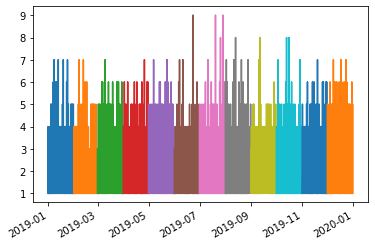

In [80]:
date.loc['2019','Quantity Ordered'].resample('M').plot()
plt.show()

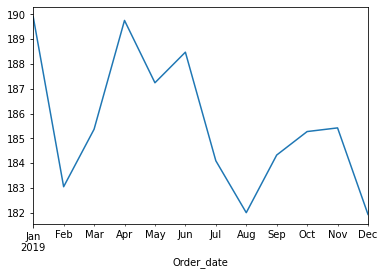

In [93]:
date.loc['2019','sals'].resample('M').mean().plot()
plt.show()

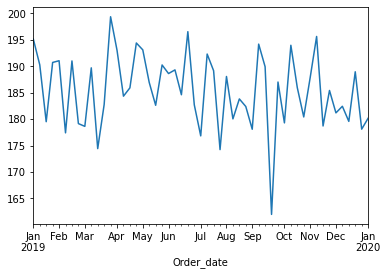

In [94]:
date.loc['2019','sals'].resample('W').mean().plot()
plt.show()
# volatilité prix vente dans la semaine

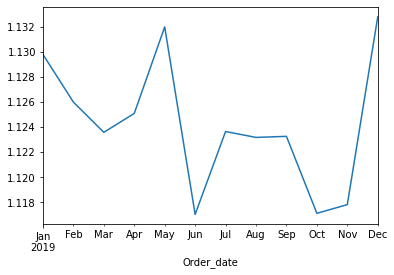

In [81]:
date.loc['2019','Quantity Ordered'].resample('M').mean().plot()
plt.show()


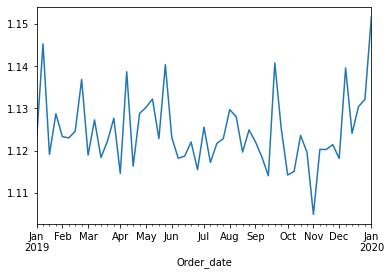

In [82]:
date.loc['2019','Quantity Ordered'].resample('W').mean().plot()
plt.show()
##L'analyse de la  volatilité du quantitié commandé en terme de moyenne, min et max selon les date

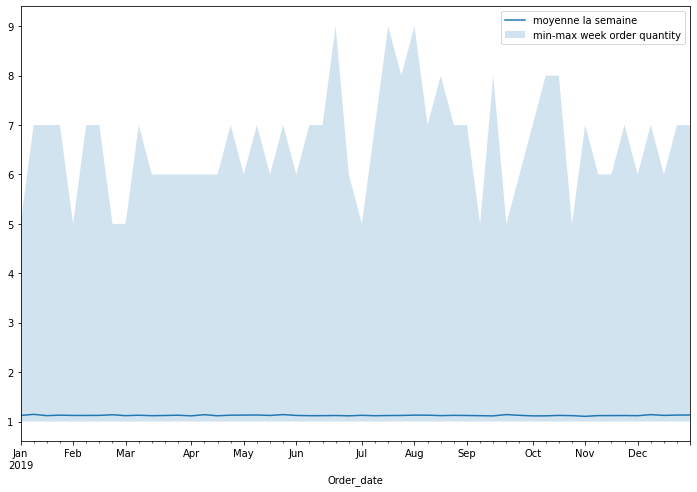

In [89]:
sem = date.loc['2019','Quantity Ordered'].resample('W').agg(['mean', 'std','min','max'])
plt.figure(figsize= (12, 8))
sem['mean']['2019'].plot(label= 'moyenne la semaine ')
plt.fill_between(sem.index, sem['max'], sem['min'], alpha = 0.2, label= 'min-max week order quantity')
plt.legend()
plt.show()

In [83]:
date.loc['2019','Quantity Ordered'].resample('W').agg(['mean', 'std','min','max'])


,mean,std,min,max
Order_date,,,,
2019-01-06,1.122648,0.405099,1,5
2019-01-13,1.145297,0.496301,1,7
2019-01-20,1.119091,0.436405,1,7
2019-01-27,1.128744,0.452048,1,7
2019-02-03,1.123304,0.436324,1,5
2019-02-10,1.123002,0.440585,1,7
2019-02-17,1.124583,0.450062,1,7
2019-02-24,1.136881,0.450798,1,5
2019-03-03,1.118932,0.412351,1,5


In [ ]:
# transformation des données

In [96]:
#big_data['Month'].unique()
date['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [98]:
date =  date.drop(['day', 'Purchase Address', 'Order ID'], axis =1)


In [99]:
date.head()

,Product,Quantity Ordered,Price Each,Month,sals,city,Hour,jour_semaine
Order_date,,,,,,,,
2019-04-19,USB-C Charging Cable,2,11.95,4,23.90,Dallas,8,4
2019-07-04,Bose SoundSport Headphones,1,99.99,4,99.99,Boston,22,6
2019-12-04,Google Phone,1,600.00,4,600.00,Los Angeles,14,4
2019-12-04,Wired Headphones,1,11.99,4,11.99,Los Angeles,14,4
2019-04-30,Wired Headphones,1,11.99,4,11.99,Los Angeles,9,1


In [100]:
date['city'] = data_date['city'].astype('object')
date['Month'] = data_date['Month'].astype('object')
date['Product'] = data_date['Product'].astype('object')
date['Hour'] = data_date['Hour'].astype('object')
date['jour_semaine'] = data_date['day'].astype('object')


In [101]:
date.dtypes

Product              object
Quantity Ordered      int64
Price Each          float64
Month                object
sals                float64
city                 object
Hour                 object
jour_semaine         object
dtype: object

In [102]:
# Create DataFrame 
df = pd.DataFrame(date) 

for _c in df.select_dtypes(include=['object']).columns:
    print(_c)
    df[_c]  = pd.Categorical(df[_c])
business = pd.get_dummies(df)
business

Product
Month
city
Hour
jour_semaine


,Quantity Ordered,Price Each,sals,Product_20in Monitor,Product_27in 4K Gaming Monitor,Product_27in FHD Monitor,Product_34in Ultrawide Monitor,Product_AA Batteries (4-pack),Product_AAA Batteries (4-pack),Product_Apple Airpods Headphones,...,jour_semaine_22,jour_semaine_23,jour_semaine_24,jour_semaine_25,jour_semaine_26,jour_semaine_27,jour_semaine_28,jour_semaine_29,jour_semaine_30,jour_semaine_31
Order_date,,,,,,,,,,,,,,,,,,,,,
2019-04-19,2,11.95,23.90,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-07-04,1,99.99,99.99,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-12-04,1,600.00,600.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-12-04,1,11.99,11.99,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04-30,1,11.99,11.99,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-17,3,2.99,8.97,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-09,1,700.00,700.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-09-23,1,700.00,700.00,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [125]:
business.dtypes

Quantity Ordered                    int64
Price Each                        float64
sals                              float64
Product_20in Monitor                uint8
Product_27in 4K Gaming Monitor      uint8
                                   ...   
jour_semaine_27                     uint8
jour_semaine_28                     uint8
jour_semaine_29                     uint8
jour_semaine_30                     uint8
jour_semaine_31                     uint8
Length: 98, dtype: object

In [106]:
! pip install statsmodels

  Using cached statsmodels-0.12.2-cp38-none-win_amd64.whl (9.4 MB)


In [113]:
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
#Fit the model
mod = sm.tsa.statespace.SARIMAX(df['Price Each'], trend='c', order=(1,1,4), seasonal_order=(0,0,0,12))
res = mod.fit(disp=False)
print(res.summary())

C:\Users\INSA\anaconda3\envs\INSA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\INSA\anaconda3\envs\INSA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\INSA\anaconda3\envs\INSA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\INSA\anaconda3\envs\INSA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but 

                               SARIMAX Results                                
Dep. Variable:             Price Each   No. Observations:               185950
Model:               SARIMAX(1, 1, 4)   Log Likelihood            -1343714.024
Date:                Sun, 26 Sep 2021   AIC                        2687442.048
Time:                        20:42:20   BIC                        2687512.981
Sample:                             0   HQIC                       2687462.992
                             - 185950                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.236e-05    4.3e-05     -0.752      0.452      -0.000    5.19e-05
ar.L1         -1.0000      0.002   -422.073      0.000      -1.005      -0.995
ma.L1         -0.0104      0.004     -2.645      0.0

C:\Users\INSA\anaconda3\envs\INSA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


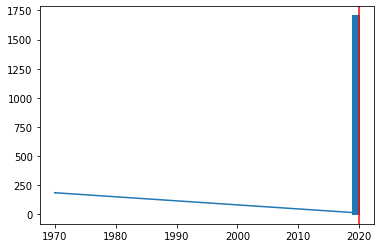

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
pred = res.predict(185950, 185961)
bc_pred = pd.concat([df['Price Each'], pred])
plt.plot(bc_pred)
plt.axvline(x='2020-01-01', color='red')

In [116]:
! pip install prophet

  Using cached prophet-1.0.1-py3-none-any.whl
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached cmdstanpy-0.9.68-py3-none-any.whl (49 kB)
  Using cached pystan-2.19.1.1-cp38-cp38-win_amd64.whl (79.8 MB)
  Using cached convertdate-2.3.2-py3-none-any.whl (47 kB)
  Using cached PyMeeus-0.5.11-py3-none-any.whl
  Using cached korean_lunar_calendar-0.2.1-py3-none-any.whl (8.0 kB)
  Using cached ephem-4.0.0.2-cp38-cp38-win_amd64.whl (808 kB)


In [118]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [130]:
c = pd.read_csv('big_datav.csv')
c.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sals,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [ ]:
c1 = c[['Price Each', 'Month']]

In [139]:
!pip install pycaret pandas shap


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\INSA\\anaconda3\\envs\\INSA\\Lib\\site-packages\\~cipy\\.libs\\libansari.R6EA3HQP5KZ6TAXU4Y4ZVTRPT7UVA53Z.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached spacy-2.3.7-cp38-cp38-win_amd64.whl (9.7 MB)
  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached scipy-1.5.4-cp38-cp38-win_amd64.whl (31.4 MB)
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached pandas_profiling-3.0.0-py2.py3-none-any.whl (248 kB)
  Using cached gensim-3.8.3-cp38-cp38-win_amd64.whl (24.2 MB)
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (

In [141]:
! pip install pycaret

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googlesearch-python 1.0.1 requires requests==2.25.1, but you have requests 2.26.0 which is incompatible.



  Using cached pycaret-2.3.4-py3-none-any.whl (266 kB)
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached plotly-5.3.1-py2.py3-none-any.whl (23.9 MB)
  Using cached lightgbm-3.2.1-py3-none-win_amd64.whl (1.0 MB)
  Using cached pandas_profiling-3.0.0-py2.py3-none-any.whl (248 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)
  Using cached cufflinks-0.17.3-py3-none-

dataiku-api-client 9.0.0 requires requests<2.22,>=2, but you have requests 2.26.0 which is incompatible.



  Using cached llvmlite-0.36.0-cp38-cp38-win_amd64.whl (16.0 MB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached requests-2.26.0-py2.py3-none-any.whl (62 kB)
  Using cached visions-0.7.1-py3-none-any.whl (102 kB)
  Using cached phik-0.12.0-cp38-cp38-win_amd64.whl (659 kB)
  Using cached Bottleneck-1.3.2-cp38-cp38-win_amd64.whl
  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
  Using cached multimethod-1.4-py2.py3-none-any.whl (7.3 kB)
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
  Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
  Using cached thinc-7.4.5-cp38-cp38-win_amd64.whl (910 kB)
  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)
  Using cached srsly-1.0.5-cp38-cp38-win_amd64.whl (178 kB)
  Using cached PyWavelets-1.1.1-cp38-cp38-win_amd64.whl (4.3 MB)
  Using cached sqlparse-0.4.2-py3-none-any.whl (42 kB)
  Using cached wait

In [142]:
import pandas as pd
from pycaret.classification import *

In [ ]:
#np.zeros((130164, 106659), dtype='uint8')
cat_features = ['Quantity Ordered', 'Month', 'city']
experiment = setup(c, target='sals', categorical_features=cat_features)
